In [38]:
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/valaba/Desktop/ironhack_labs/DAFT_0410/module_2/Lab_5_ Pivot-Tables-and-Crosstab/Employee.csv')
df

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [39]:
# What's the mean Salary by Department?

# Tip: There are 2 ways to do it: with or without pivot tables. Do it both ways.

df.groupby("Department")["Salary"].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [40]:
df[['Department','Salary']].pivot_table(index='Department', values='Salary', aggfunc=np.mean)

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [41]:
# group the data by more than one column.
# Use Pandas pivot table function to select the mean Salary by Department and Title.

df[['Department','Salary', "Title"]].pivot_table(index='Department', columns= "Title", values='Salary', aggfunc=np.mean).replace(np.nan,0)

Title,VP,analyst,associate
Department,,,
HR,70.0,32.5,0.0
IT,70.0,32.5,60.0
Sales,0.0,0.0,55.0


In [42]:
# Display the number of Years of work experience and the Salary for each Title. 
# Add Years as a column in your pivot table.

df[['Years','Salary', "Title"]].pivot_table(index='Title', values=['Years','Salary']).replace(np.nan,0)

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


In [43]:
# Find the mean Salary and number of employees in each Department and for each job Title.

df[['Department','Title','Salary']].pivot_table(index=['Department','Title'], values='Salary', aggfunc=[len, np.mean])

len   mean
                     Salary Salary
Department Title                  
HR         VP             1   70.0
           analyst        2   32.5
IT         VP             1   70.0
           analyst        2   32.5
           associate      1   60.0
Sales      associate      2   55.0

In [79]:
# For each Department and each job Title, find the Salary median, minimum, maximum and standard deviation. 
# Comment your results.
# Based on your comments, fill the missing values with an appropriate value.

new_df = df[['Department','Title','Salary']].pivot_table(index=['Department','Title'], values='Salary', aggfunc=[np.mean, min, max, np.std]).replace(np.nan,0)

new_df.columns = new_df.columns.map({new_df.columns[0]:"Average Salary", new_df.columns[1]:"Minimum Salary", new_df.columns[2]:"Maximum Salary" ,new_df.columns[3]:"Standard Deviation of Salary"})

new_df

Average Salary  Minimum Salary  Maximum Salary  \
Department Title                                                       
HR         VP                   70.0              70              70   
           analyst              32.5              30              35   
IT         VP                   70.0              70              70   
           analyst              32.5              30              35   
           associate            60.0              60              60   
Sales      associate            55.0              55              55   

                      Standard Deviation of Salary  
Department Title                                    
HR         VP                             0.000000  
           analyst                        3.535534  
IT         VP                             0.000000  
           analyst                        3.535534  
           associate                      0.000000  
Sales      associate                      0.000000

In [45]:
# We can see that the analysts have the lowest salary while VPs have the highest salary. 
# The salary for associates of IT is higher than the salary for the same title in Sales department

In [50]:
# Based on your comments, fill the missing values with an appropriate value.


In [78]:
# The stake holders want to know, for each Department, 
# the number of employees and how much money is spent on salaries. Could you provide that information?

#pd.crosstab([df['Department']], values=df['fare'], aggfunc=[len,np.mean], margins=True, margins_name='Total')
#["No of Employees","Total Salary"]

df2 = df[['Department','Salary']].pivot_table(index=['Department'], values='Salary', aggfunc=[len,sum])

df2.columns = df2.columns.map({df2.columns[0]:"No of Employees", df2.columns[1]:"Total Salary"})

df2

,No of Employees,Total Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


In [85]:
# For each Department and Title, find the the total years of work experience and the mean Salary.

df3 = df[['Department','Title','Salary',"Years"]].pivot_table(index=['Department','Title'], values=['Years','Salary'], aggfunc=[sum,np.mean])

df3.columns = df3.columns.map({df3.columns[0]:"Total Salary", df3.columns[1]:"Total Years", df3.columns[2]:"Average Salary" ,df3.columns[3]:"Average Year"})

df3[["Total Years","Average Salary"]]


Total Years  Average Salary
Department Title                                 
HR         VP                   8            70.0
           analyst              6            32.5
IT         VP                   8            70.0
           analyst              3            32.5
           associate            7            60.0
Sales      associate            5            55.0

In [ ]:
# Bonus Challenge 1

# Compute the mean Salary after removing the maximum Salary for each Department. Create the appropriate pivot table.

# Hint: Write a custom function.



In [86]:
# Challenge 2

fitbit = pd.read_csv('/Users/valaba/Desktop/ironhack_labs/DAFT_0410/module_2/Lab_5_ Pivot-Tables-and-Crosstab/Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


In [87]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

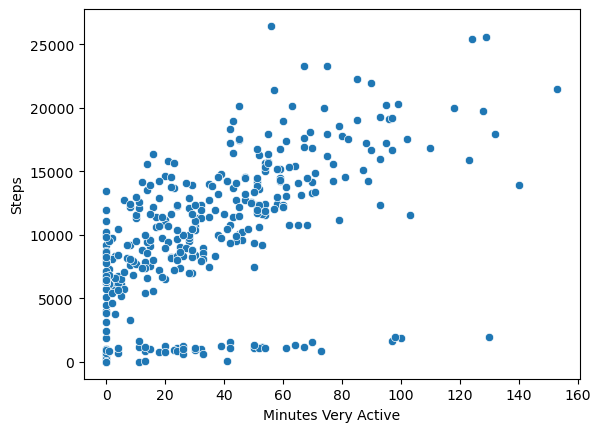

In [89]:
# You suspect that there must be a linear relationship between the Minutes Very Active and the Steps.
# Compute the correlation between these variables.

sns.scatterplot(x="Minutes Very Active", y="Steps",data=fitbit);

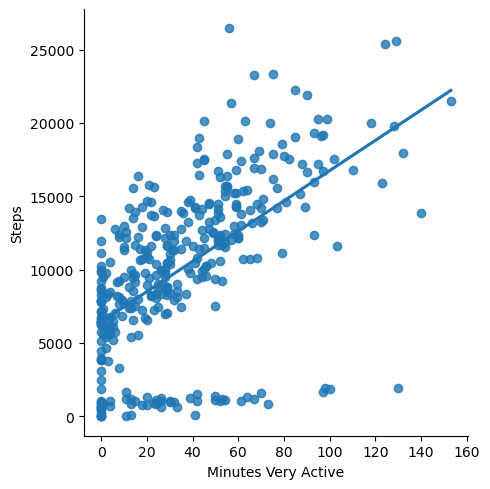

In [91]:
sns.lmplot(x="Minutes Very Active", y="Steps",data=fitbit, ci=None);

In [92]:
#The data looks more closely clustered around the trendline than it would with a correlation higher than 0.3.

cor = fitbit["Minutes Very Active"].corr(fitbit["Steps"])
cor

0.5714518481062608

In [ ]:
# The correlation between Minutes Very Active and Steps is 0.5714518481062608 
# which means as Minutes Very Active increases, the Number of Steps will increase accordingly. 

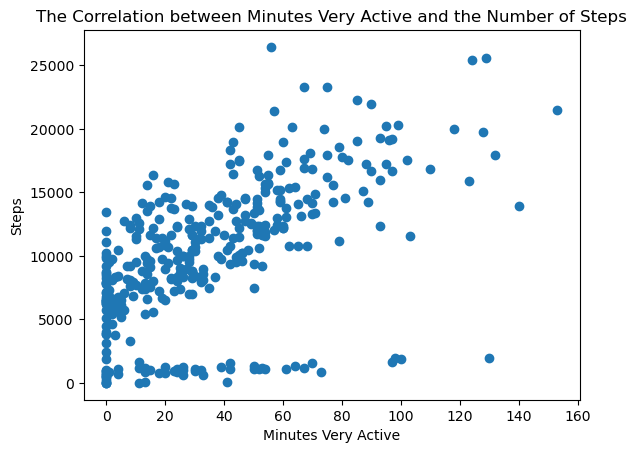

In [94]:
# Use matplotlib to visually plot Minutes Very active vs Steps. 

plt.scatter(x=fitbit["Minutes Very Active"], y=fitbit["Steps"])
plt.title("The Correlation between Minutes Very Active and the Number of Steps")
plt.xlabel("Minutes Very Active")
plt.ylabel("Steps")
plt.show()


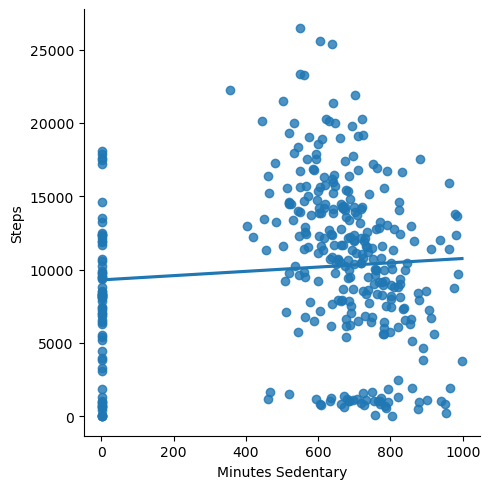

In [96]:
# We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. 
# Compute the correlation between these variables.

sns.lmplot(x="Minutes Sedentary", y="Steps",data=fitbit, ci=None);

In [97]:
cor2 = fitbit["Minutes Sedentary"].corr(fitbit["Steps"])
cor2

0.07690608062990091

In [ ]:
# There is no relationship between Minutes Sedentary and Number of Steps because the correlation is close to 0.

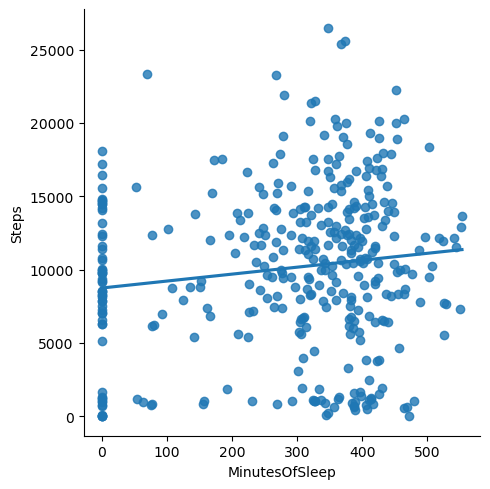

In [98]:
# We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. 
# Compute the correlation between these variables.

sns.lmplot(x="MinutesOfSleep", y="Steps",data=fitbit, ci=None);

In [99]:
cor2 = fitbit["MinutesOfSleep"].corr(fitbit["Steps"])
cor2

0.1309856595083638

In [ ]:
# There is a weak relationship between Minutes Of Sleep and the Number of Steps.

In [102]:
# Select a subset of your dataset with the columns below and compute the correlation matrix.
# Save the results in the variable cor_fit.

#columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

cor_fit = fitbit[['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']].corr()

cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


In [ ]:
# The Minutes Very Active is highly correlated with Number of Steps.

In [103]:
# Challenge 3

grades = pd.read_csv('/Users/valaba/Desktop/ironhack_labs/DAFT_0410/module_2/Lab_5_ Pivot-Tables-and-Crosstab/Time_Grades.csv')

grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


In [104]:
grades.isna().sum()

Name          0
Study time    0
Grade         0
dtype: int64

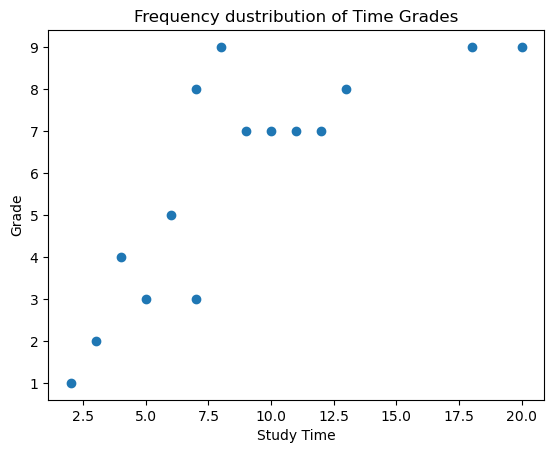

In [115]:
# Show visually the frequency distribution of the time_grades dataset.

plt.scatter(grades['Study time'], grades['Grade'])
plt.title("Frequency dustribution of Time Grades")
plt.xlabel("Study Time")
plt.ylabel("Grade")
plt.show()

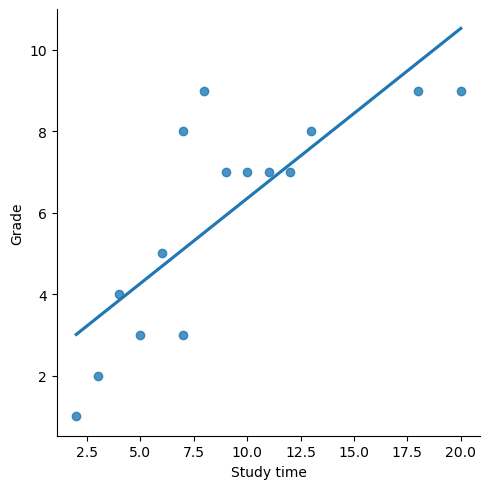

In [116]:
sns.lmplot(x="Study time", y="Grade",data=grades, ci=None);